# Linear Algebra and Geometry: A Comprehensive Guide

##  Introduction

Linear algebra is the mathematical foundation of modern data science, machine learning, computer graphics, and physics. At its core, it studies **vectors**, **matrices**, and **linear transformations**—powerful tools for understanding how things move, rotate, and change.

### Why Should You Care?

- **Machine Learning**: Neural networks operate on vectors and matrices
- **Computer Graphics**: 3D rotations, scaling, and transformations use matrices
- **Data Science**: Data is organized as vectors and matrices
- **Physics & Engineering**: Forces, velocities, and electromagnetic fields are vectors

### What We'll Explore

1. **Vectors and their operations** — The building blocks of linear algebra
2. **Dot and cross products** — Measuring angles and orientations
3. **Lines and planes** — Geometric objects in space
4. **Linear transformations and matrices** — How things change
5. **Determinants** — Understanding scale and orientation changes
6. **Eigenvalues and eigenvectors** — The "special" directions of transformations

By the end of this notebook, you'll understand the deep geometric intuition behind linear algebra—not just the math, but the *why*.

---

## 1️ Vectors: The Building Blocks

### What is a Vector?

A **vector** is a quantity with both **magnitude** (size) and **direction**. Think of it as an arrow:

- **Magnitude**: How long is the arrow?
- **Direction**: Which way does it point?

**Real-world examples:**
- **Velocity**: "Car moving at 60 mph northeast" 
- **Force**: "Pushing with 10 N force downward"
- **Displacement**: "Walking 5 km northeast"

### Vector Notation

In 2D space:
$$\vec{v} = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} \text{ or } \vec{v} = (v_1, v_2)$$

In 3D space:
$$\vec{v} = \begin{pmatrix} v_1 \\ v_2 \\ v_3 \end{pmatrix}$$

**Example**: The vector $\vec{v} = (3, 4)$ points 3 units right and 4 units up.

### Vector Operations

#### 1. **Vector Addition** 

Adding vectors means placing them tip-to-tail:
$$\vec{u} + \vec{v} = \begin{pmatrix} u_1 + v_1 \\ u_2 + v_2 \end{pmatrix}$$

**Geometric interpretation**: The sum is the diagonal of the parallelogram formed by $\vec{u}$ and $\vec{v}$.

**Real-world example**: If you walk 3 km east, then 4 km north, your total displacement is $\sqrt{3^2 + 4^2} = 5$ km northeast.

#### 2. **Scalar Multiplication** 

Multiplying a vector by a number scales its length:
$$c\vec{v} = \begin{pmatrix} cv_1 \\ cv_2 \end{pmatrix}$$

**Rules:**
- If $c > 1$: Vector gets longer
- If $0 < c < 1$: Vector gets shorter
- If $c < 0$: Vector reverses direction
- If $c = 0$: Vector disappears (zero vector)

**Example**: If $\vec{v} = (2, 1)$, then $2\vec{v} = (4, 2)$ is twice as long, pointing the same direction.

#### 3. **Linear Combinations** 

Combining scaled vectors reveals new directions:
$$a\vec{u} + b\vec{v}$$

**Example**: $2\vec{u} + 3\vec{v}$ means "2 times vector u plus 3 times vector v"

---

###  Visualizing Vector Operations in 2D

The code below shows vector addition and the parallelogram law:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

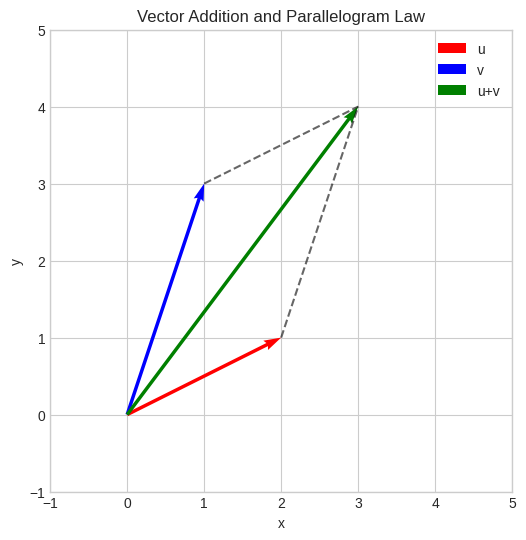

In [3]:
# Define two vectors in 2D
u = np.array([2, 1])
v = np.array([1, 3])

# Plot them
origin = np.array([0, 0])
plt.figure(figsize=(6,6))
plt.quiver(*origin, *u, color='r', angles='xy', scale_units='xy', scale=1, label='u')
plt.quiver(*origin, *v, color='b', angles='xy', scale_units='xy', scale=1, label='v')

# Vector addition
u_plus_v = u + v
plt.quiver(*origin, *u_plus_v, color='g', angles='xy', scale_units='xy', scale=1, label='u+v')

# Parallelogram
plt.plot([u[0], u_plus_v[0]], [u[1], u_plus_v[1]], 'k--', alpha=0.6)
plt.plot([v[0], u_plus_v[0]], [v[1], u_plus_v[1]], 'k--', alpha=0.6)

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.legend()
plt.title('Vector Addition and Parallelogram Law')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show()

---

## 2️ Vector Magnitude: How Long is the Arrow?

### The Vector Norm (Euclidean Length)

The **magnitude** or **length** of a vector is its Euclidean norm, denoted $\|\vec{v}\|$ or $|\vec{v}|$.

**Formula for 2D:**
$$\|\vec{v}\| = \sqrt{v_1^2 + v_2^2}$$

**Formula for 3D:**
$$\|\vec{v}\| = \sqrt{v_1^2 + v_2^2 + v_3^2}$$

**General formula (n-dimensional):**
$$\|\vec{v}\| = \sqrt{\sum_{i=1}^{n} v_i^2}$$

### Why This Formula?

This comes from the **Pythagorean theorem**! For a 2D vector $(v_1, v_2)$:
- The horizontal distance is $v_1$
- The vertical distance is $v_2$  
- The diagonal (hypotenuse) is $\sqrt{v_1^2 + v_2^2}$

**Example**: Vector $\vec{v} = (3, 4)$
$$\|\vec{v}\| = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5$$

### Unit Vectors: Arrows of Length 1

A **unit vector** is a vector with length exactly 1. It shows only the *direction*, not the magnitude.

**Creating a unit vector (Normalization):**
$$\hat{v} = \frac{\vec{v}}{\|\vec{v}\|}$$

This formula scales the vector so its length becomes 1, while keeping its direction.

**Example**: Normalize $\vec{v} = (3, 4)$
$$\hat{v} = \frac{(3, 4)}{5} = \left(\frac{3}{5}, \frac{4}{5}\right) = (0.6, 0.8)$$

Check: $\|(0.6, 0.8)\| = \sqrt{0.36 + 0.64} = \sqrt{1} = 1$ ✓

### Standard Basis Unit Vectors

In 2D, the most basic unit vectors are:
$$\hat{i} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \hat{j} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

Any 2D vector can be written as a combination:
$$\vec{v} = (3, 4) = 3\hat{i} + 4\hat{j}$$

### Real-World Intuition

**Magnitude tells us "how much":**
- Velocity vector magnitude = speed (how fast)
- Force vector magnitude = strength (how hard)
- Displacement vector magnitude = distance traveled

**Direction tells us "which way."**

Together, they form the complete picture of a physical quantity!

In [5]:
# Compute norms
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)
print(f"||u|| = {norm_u:.2f}")
print(f"||v|| = {norm_v:.2f}")

# Unit vectors
u_hat = u / norm_u
v_hat = v / norm_v
print(f"Unit vector û = {u_hat}")
print(f"Length of û = {np.linalg.norm(u_hat):.2f}")

||u|| = 2.24
||v|| = 3.16
Unit vector û = [0.89442719 0.4472136 ]
Length of û = 1.00
